Análisis de frecuencia de palabras según subtítulos de videos (ejecutar primero subs_to_matrix.py para generar los archivos necesarios)

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 'data/'

with open(data + 'tokens_freq.json') as tokens_file:
  tokens_freq = { k: float(v) for k, v in json.load(tokens_file).items()}
with open(data + 'file_texts.json') as files_file:
  file_texts = json.load(files_file)

In [2]:
def filter_words_by_freq(d: dict, freq: int) -> (dict, dict):
    '''Filter words from word dict d that have frequency lower than freq'''
    filtered = dict()
    remaining = dict()
    for k, v in d.items():
        if v >= freq:
            remaining[k] = v
        else:
            filtered[k] = v
    return remaining, filtered

def filter_files_by_words(files: dict, filtered_words: dict) -> (dict, dict):
    '''Filter files which contain words in filtered_words'''
    remaining = {}
    filtered = {}
    for t, f in file_texts.items():
        for word in filtered_words.keys():
            if word in f.keys():
                filtered[t] = f
                break
        if not filtered.get(t, False):
            remaining[t] = f
    return remaining, filtered

Análisis de la frecuencia de aparición de cada token del vocabulario

In [3]:
word_freqs_r, word_freqs_f = filter_words_by_freq(tokens_freq, 0)
word_freqs = pd.Series(word_freqs_r, name="Word Frequency")
word_freqs = word_freqs.sort_values(ascending=False)
word_freqs.describe()

count    54025.000000
mean        23.093642
std        156.434752
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      10818.000000
Name: Word Frequency, dtype: float64

In [4]:
word_freqs.head(10)

si       10818.0
         10178.0
bueno     8299.0
va        7201.0
ver       5453.0
ahora     5113.0
vamos     4705.0
hoy       4651.0
ser       4401.0
así       4377.0
Name: Word Frequency, dtype: float64

/home/pedroodb/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

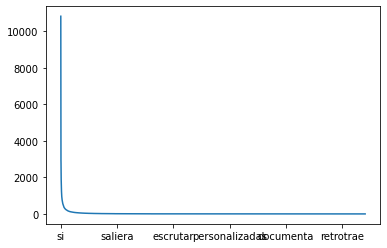

In [5]:
word_freqs.plot()

Porcentaje de tokens filtrados sobre el total al variar la frecuencia minima 

In [6]:
filtered_to_perc = lambda rf : 100 * len(rf[1]) / (len(rf[0]) + len(rf[1]))

filtered_words = [filter_words_by_freq(tokens_freq, i) for i in range(100)]

word_percents = map(filtered_to_perc, filtered_words)
word_percent_series = pd.Series(word_percents, name="Percent of words filtered by frequency")
word_percent_series.describe()

count    100.000000
mean      88.196909
std       15.633513
min        0.000000
25%       88.686719
50%       93.192966
75%       95.094401
max       96.155484
Name: Percent of words filtered by frequency, dtype: float64

<AxesSubplot:>

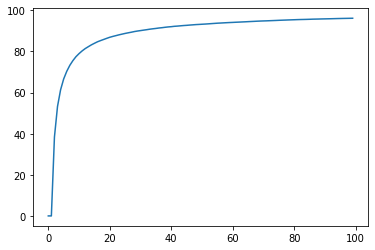

In [7]:
word_percent_series.plot()

Porcentaje de videos filtrados al variar frecuencia mínima para filtrar palabra

In [8]:
filtered_files = [filter_files_by_words(file_texts, f_tokens[1]) for f_tokens in filtered_words]

file_percents = map(filtered_to_perc, filtered_files)
file_percent_series = pd.Series(file_percents, name="Percent of files filtered by frequency")
file_percent_series.describe()

count    100.000000
mean      97.791713
std       14.071678
min        0.000000
25%       99.944009
50%       99.944009
75%       99.944009
max       99.944009
Name: Percent of files filtered by frequency, dtype: float64

<AxesSubplot:>

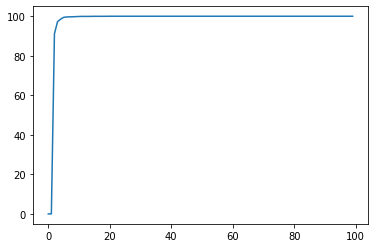

In [9]:
file_percent_series.plot()

Zoom en el gráfico anterior

<AxesSubplot:>

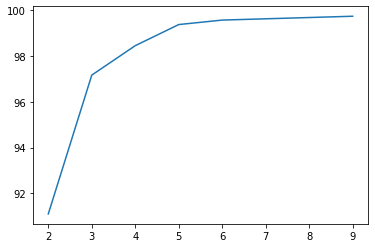

In [35]:
file_percent_series.iloc[2:10].plot()

Mismo análisis pero en función del tiempo en lugar del porcentaje

In [20]:
filtered_to_time = lambda rem, vids_l : sum(map(lambda f: vids_l.get(f, 0), rem))

time_parse = lambda vlen: vlen[0] + vlen[1]/60 + vlen[2]/(60*60)

vids_l = {}
for f in file_texts.keys():
    with open('CleanSubs/' + f) as f_subs:
        vlen = list(f_subs)[-1].split(',')[1].split(':')
        if(len(vlen) == 3):
            vids_l[f] = time_parse(list(map(float, vlen)))

In [21]:
filtered_times = [sum(map(lambda f: vids_l.get(f, 0), rem.keys())) for rem, fil in filtered_files]
video_times_series = pd.Series(filtered_times, name="Hours by word frequency filtered")
video_times_series.describe()

count    100.000000
mean       5.671719
std       38.924007
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      276.690413
Name: Hours by word frequency filtered, dtype: float64

<AxesSubplot:>

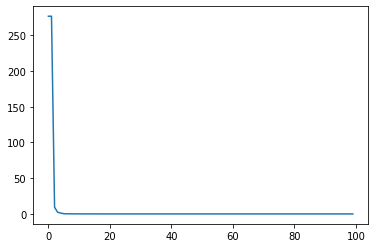

In [22]:
video_times_series.plot()

Zoom en el gráfico anterior 

<AxesSubplot:>

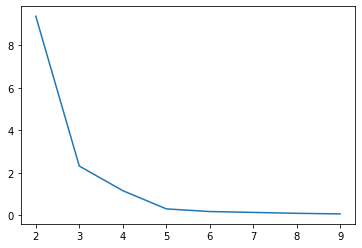

In [25]:
video_times_series.iloc[2:10].plot()

Gráfico de barras con los videos en el eje x donde se le asocian la cantidad de palabras coloreadas segun su frecuencia

Showing 200 of 3572 videos


<AxesSubplot:>

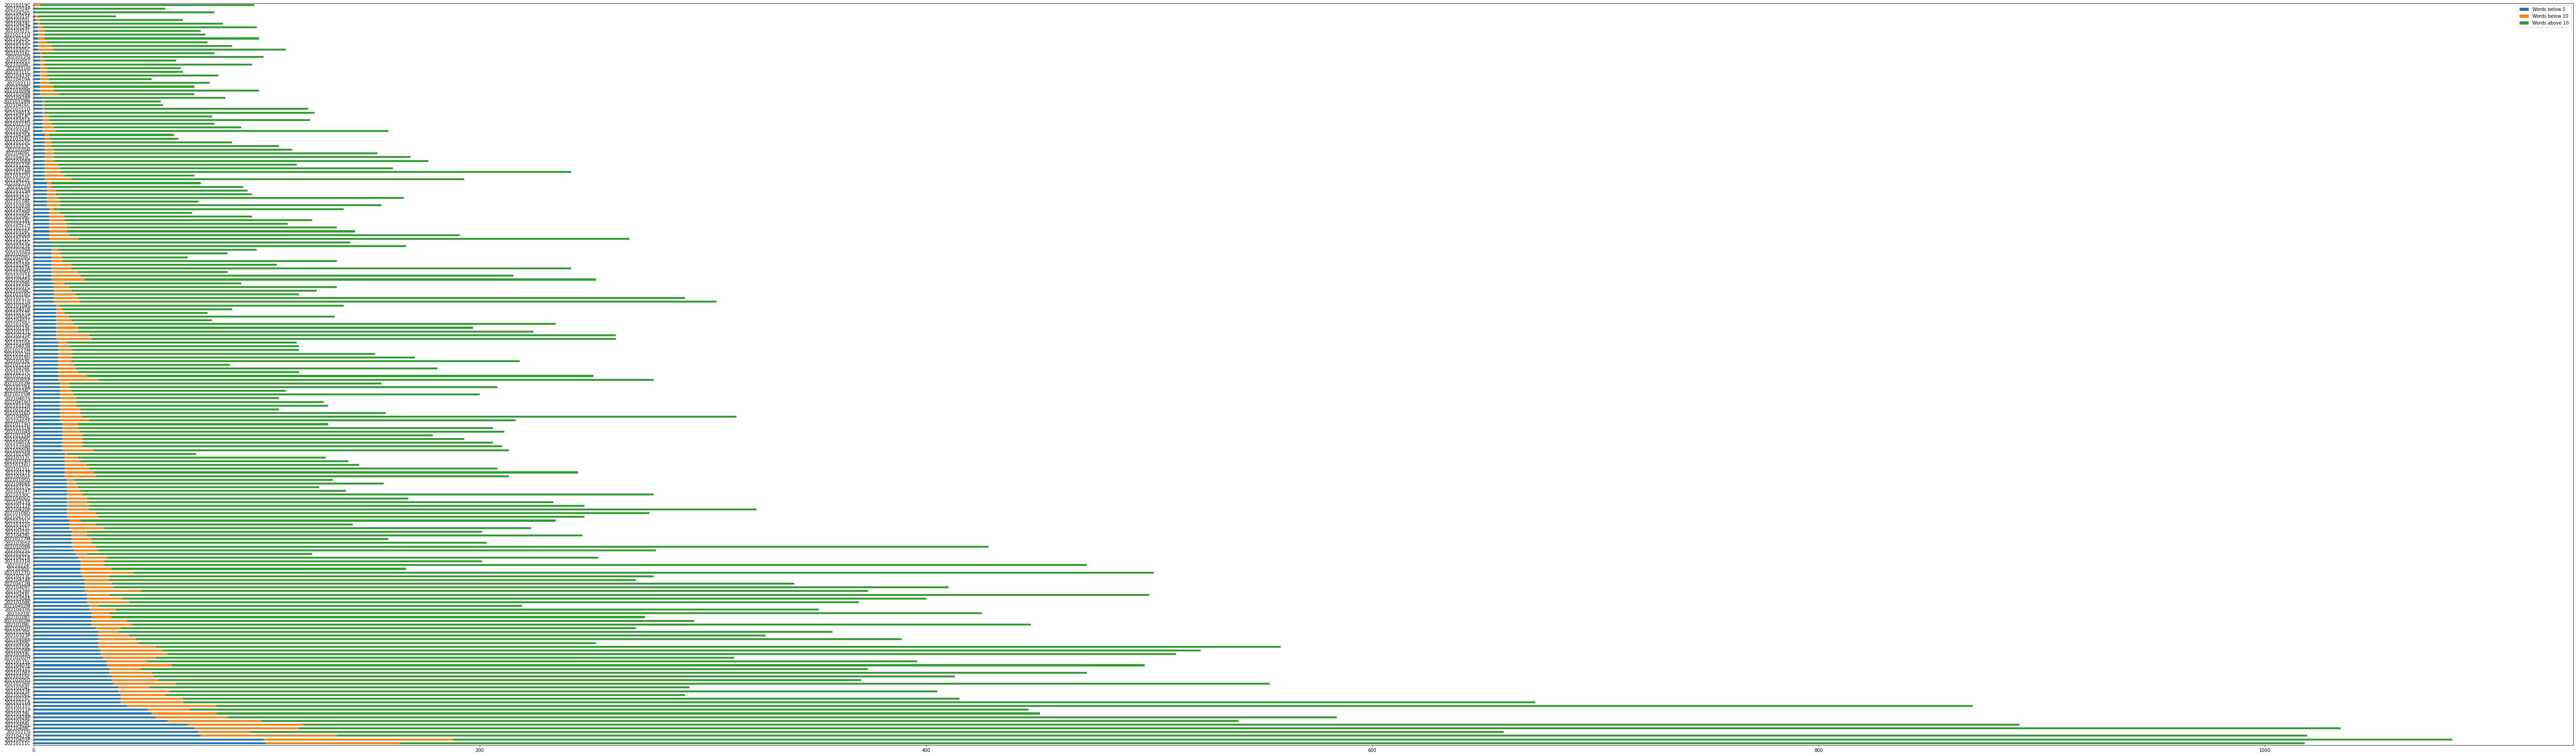

In [26]:
lim1, lim2 = 5, 10
label1, label2, label3 = 'Words below {}'.format(lim1), 'Words below {}'.format(lim2), 'Words above {}'.format(lim2), 
show = 200

format_titles = lambda t: t.split('-')[0] + t.split('-')[1][0]

words_lims = [[0 for _ in file_texts.keys()] for i in range(3)]

for i, (f, words) in enumerate(file_texts.items()):
    for word in words:
        words_lims[0 if tokens_freq[word] < lim1 else 1 if tokens_freq[word] < lim2 else 2][i] += 1

vid_wf = pd.DataFrame({label1: words_lims[0][:show],
                   label2: words_lims[1][:show],
                   label3: words_lims[2][:show]}, index=list(map(format_titles, file_texts.keys()))[:show])
vid_wf = vid_wf.sort_values(by=[label1, label2, label3], ascending=False)

print("Showing {} of {} videos".format(show, len(file_texts)))
vid_wf.plot.barh(stacked=True, figsize=(100,30))

Mismo que el anterior pero ahora con el porcentaje de palabras de cada video

Showing 200 of 3572 videos


<AxesSubplot:>

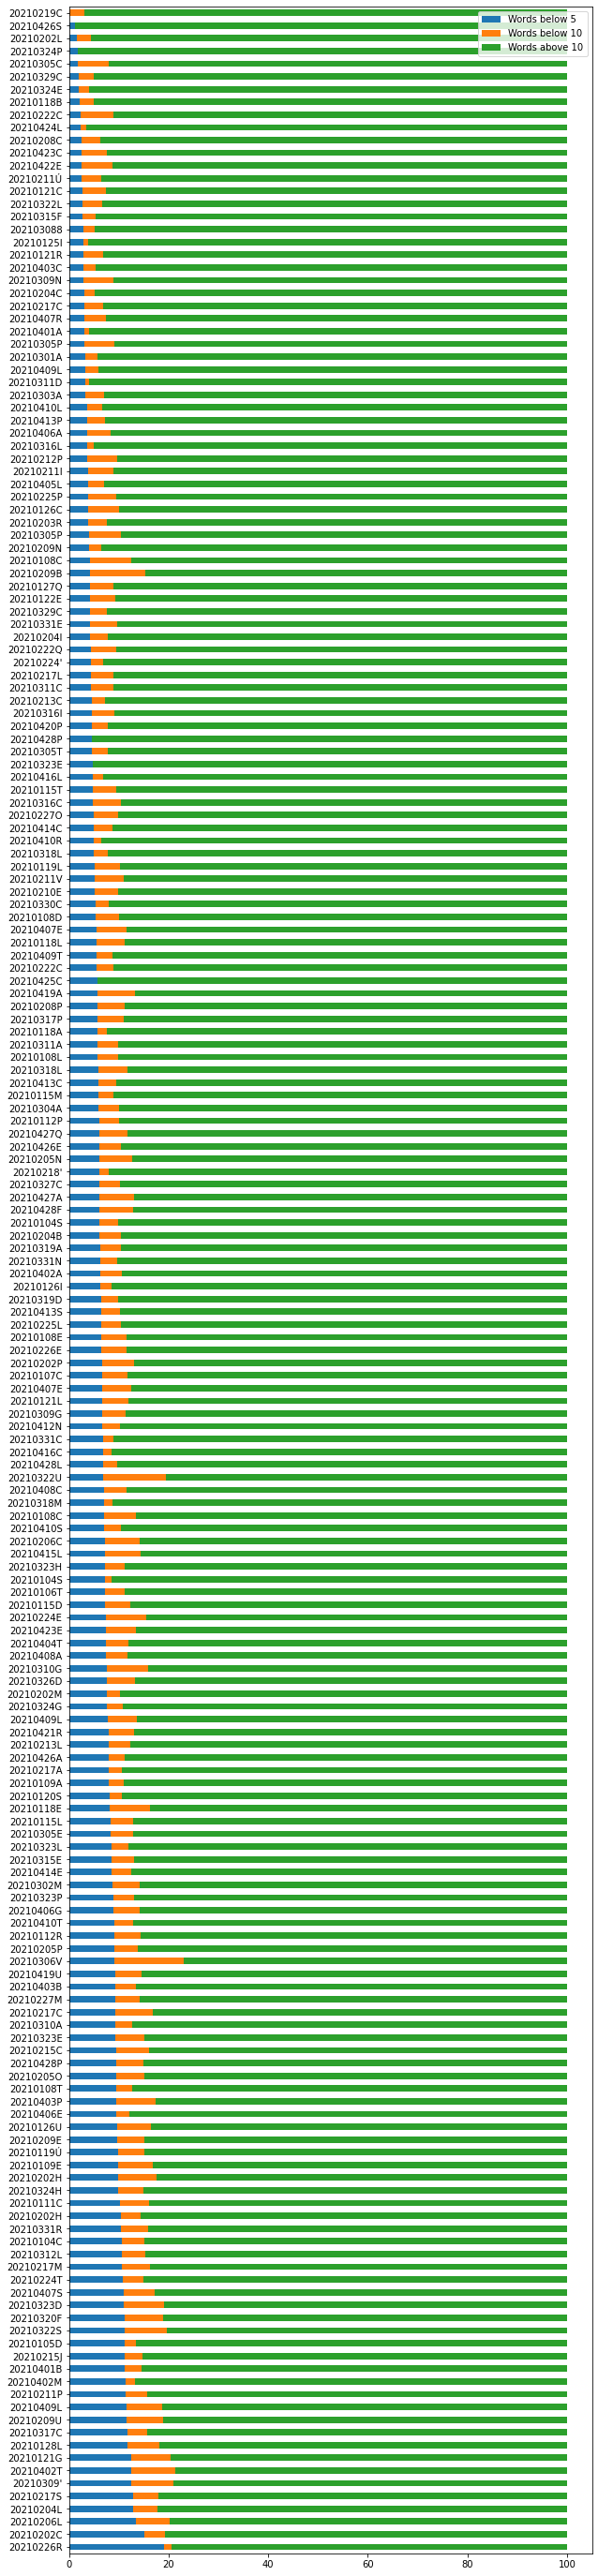

In [27]:
show_p = 200

wl_p = [[q*100/(words_lims[0][i] + words_lims[1][i] + words_lims[2][i]) for i, q in enumerate(wl)] for wl in words_lims]

vid_wf = pd.DataFrame({label1: wl_p[0][:show_p],
                   label2: wl_p[1][:show_p],
                   label3: wl_p[2][:show_p]}, index=list(map(format_titles, file_texts.keys()))[:show_p])
vid_wf = vid_wf.sort_values(by=[label1, label2, label3], ascending=False)

print("Showing {} of {} videos".format(show_p, len(file_texts)))
vid_wf.plot.barh(stacked=True, figsize=(10,50))

Mismos gráficos que los anteriores pero ahora tomando los videos que no utilizan palabras con frecuencia menor a freq_limit

In [28]:
freq_limit = 2
filtered_file_texts = filtered_files[freq_limit][0]
ftimes = {f: vids_l.get(f, 0) for f in filtered_file_texts.keys()}
print('{} videos restantes, total de {} horas'.format(len(filtered_file_texts), sum(ftimes.values())))

318 videos restantes, total de 9.357594166666663 horas


In [31]:
lim1, lim2 = 5, 10
label1, label2, label3 = 'Words below {}'.format(lim1), 'Words below {}'.format(lim2), 'Words above {}'.format(lim2)

fwords_lims = [[0 for _ in filtered_file_texts.keys()] for i in range(3)]

for i, (f, words) in enumerate(filtered_file_texts.items()):
    for word in words:
        fwords_lims[0 if tokens_freq[word] < lim1 else 1 if tokens_freq[word] < lim2 else 2][i] += 1

Showing 318 videos


<AxesSubplot:>

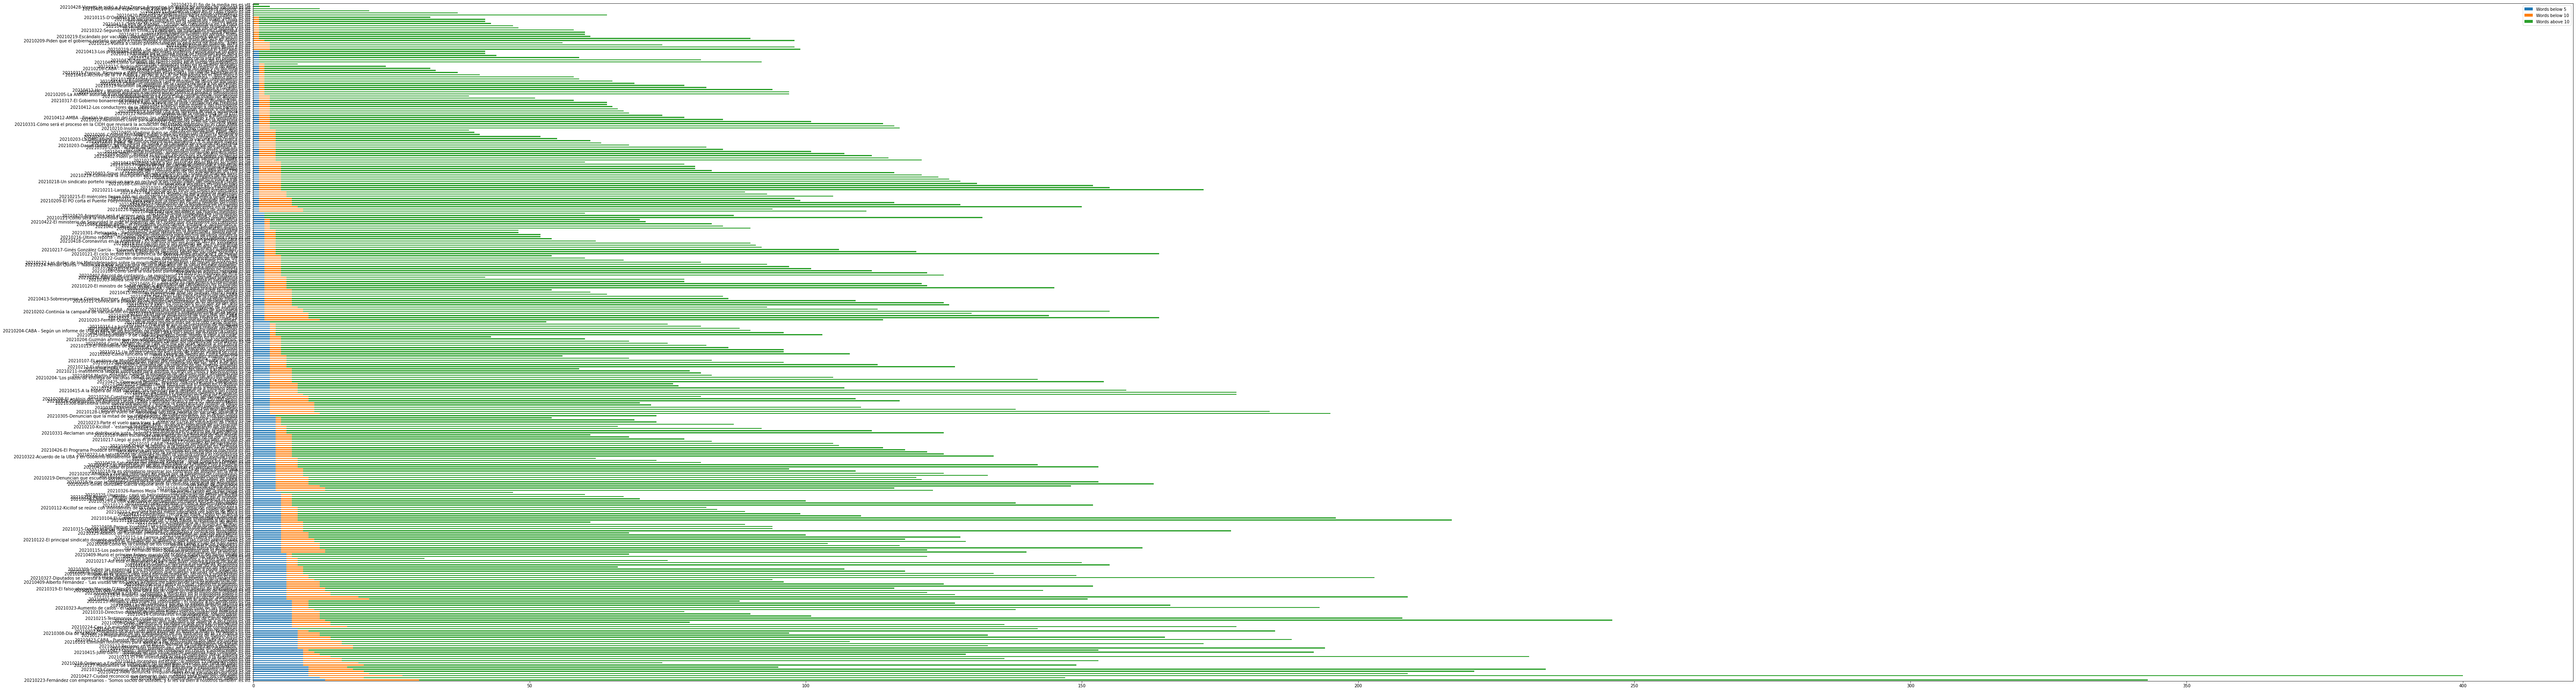

In [32]:
vid_wf = pd.DataFrame({label1: fwords_lims[0],
                   label2: fwords_lims[1],
                   label3: fwords_lims[2]}, index=filtered_file_texts)
vid_wf = vid_wf.sort_values(by=[label1, label2, label3], ascending=False)

print("Showing {} videos".format(len(filtered_file_texts)))
vid_wf.plot.barh(stacked=True, figsize=(100,30))

In [33]:
show_p = 200
fwl_p = [[q*100/(fwords_lims[0][i] + fwords_lims[1][i] + fwords_lims[2][i]) for i, q in enumerate(wl)] for wl in fwords_lims]

Showing 318 videos


<AxesSubplot:>

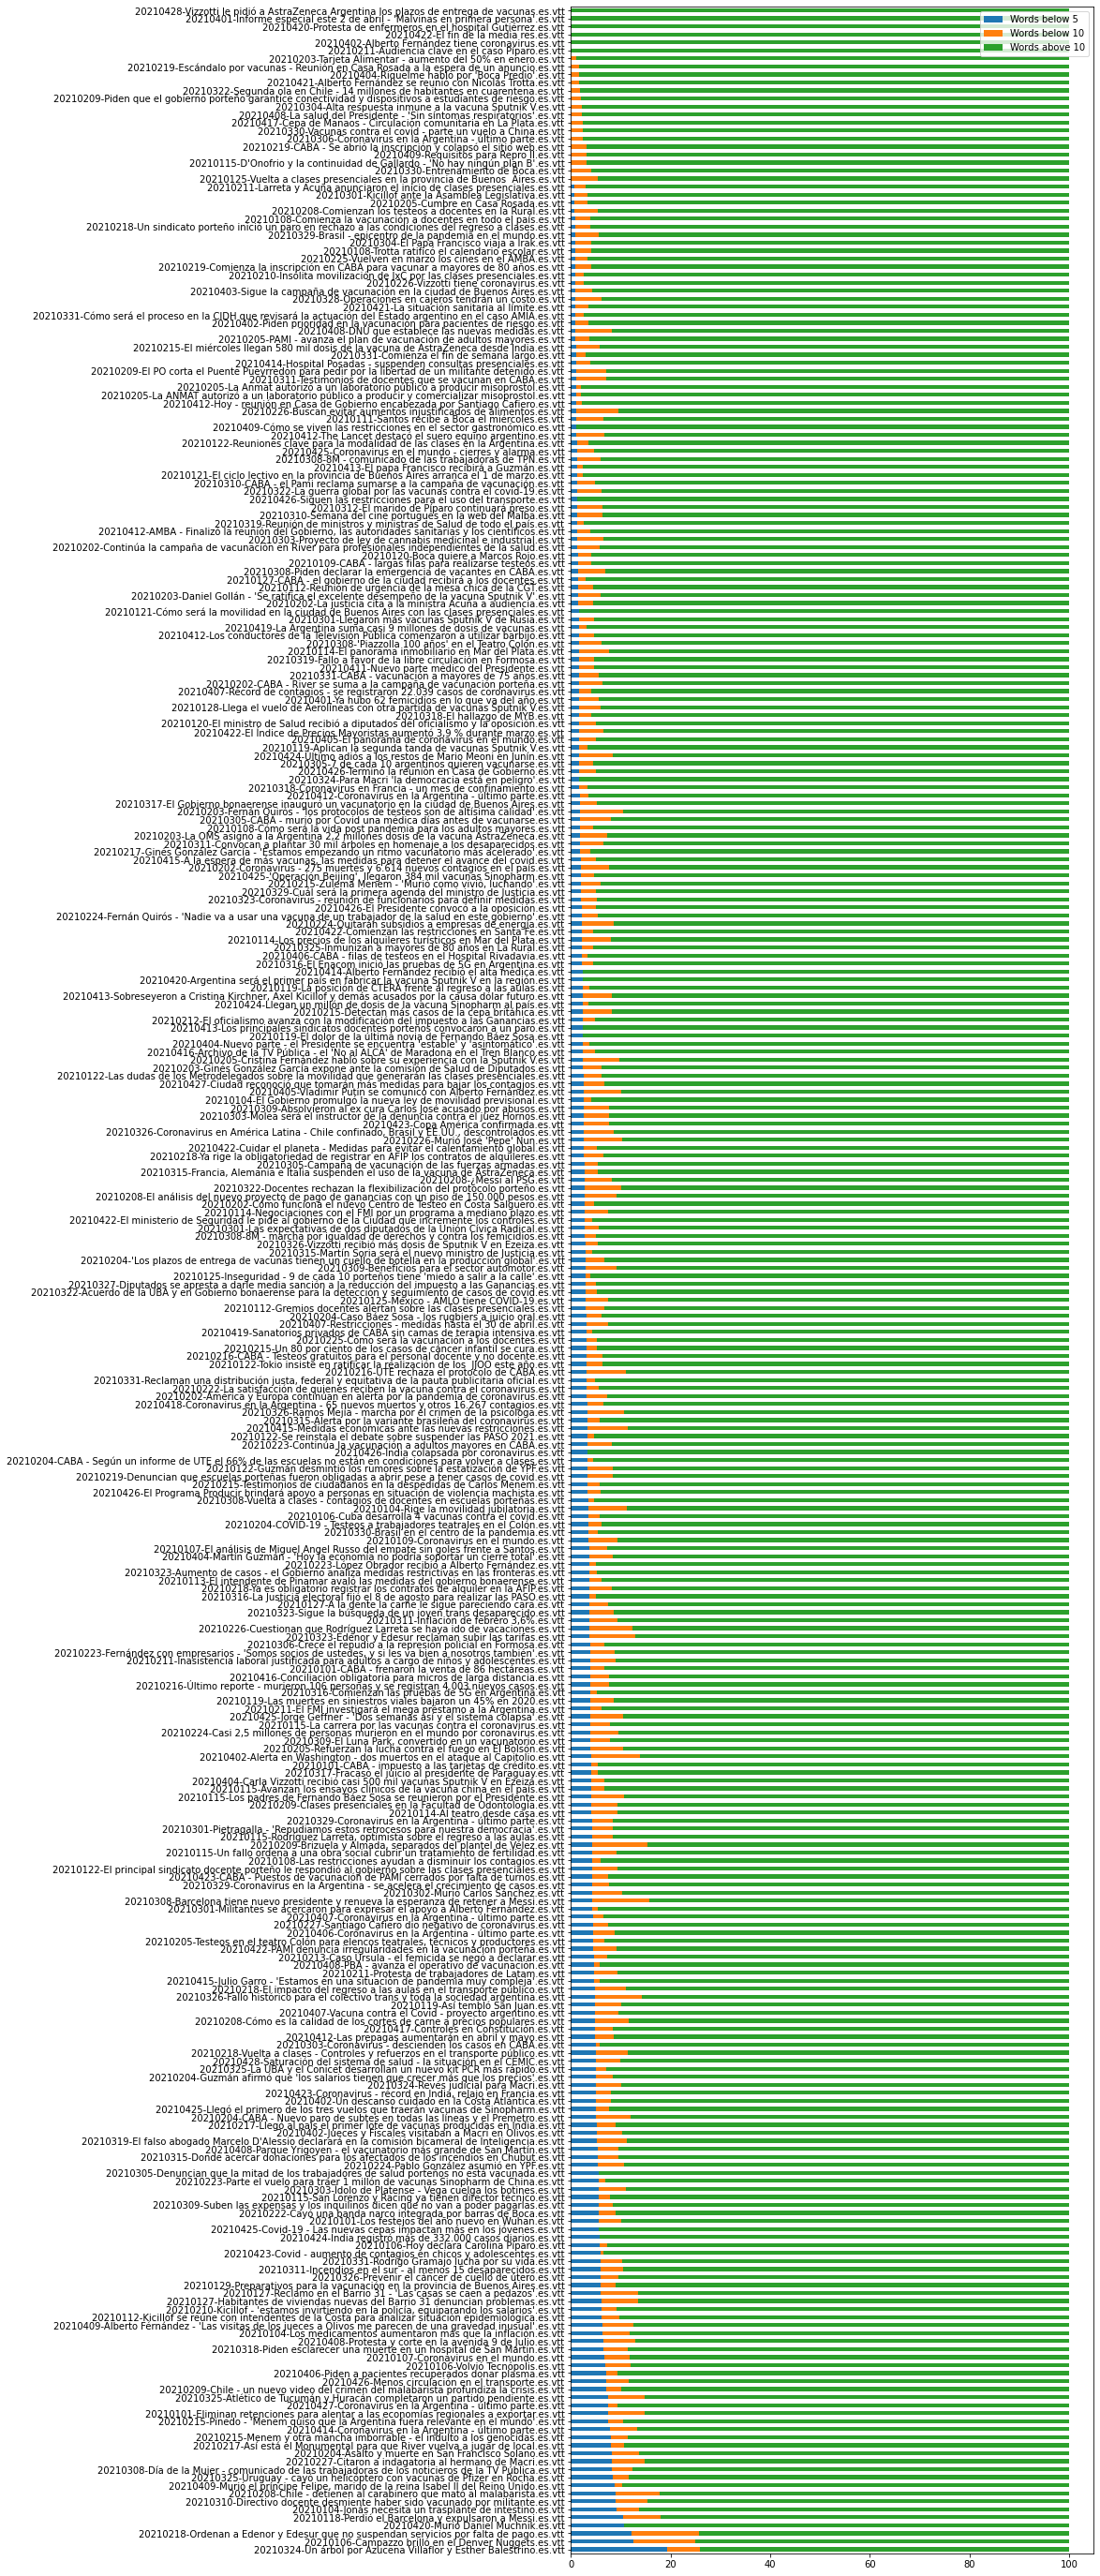

In [34]:
fvid_wf = pd.DataFrame({label1: fwl_p[0],
                   label2: fwl_p[1],
                   label3: fwl_p[2]}, index=filtered_file_texts)
fvid_wf = fvid_wf.sort_values(by=[label1, label2, label3], ascending=False)

print("Showing {} videos".format(len(filtered_file_texts)))
fvid_wf.plot.barh(stacked=True, figsize=(10,50))